In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [2]:
casos_df = pd.read_csv("datasets/dados_casos.csv")
casos_df.head(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175
3,2021-08-22,PB,Alagoa Nova,city,1511,25,True,20921,2500403,7222.40811,0.0165
4,2021-08-22,PB,Alagoinha,city,2072,25,True,14560,2500502,14230.76923,0.0121


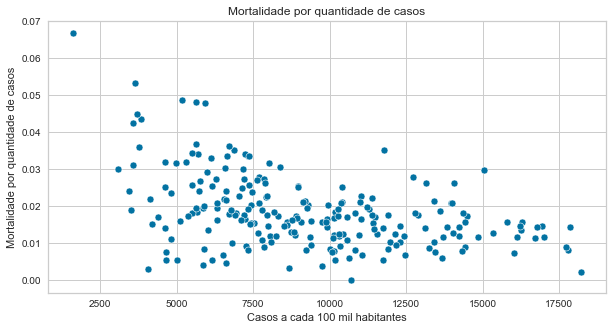

In [19]:
sct = sns.scatterplot(x = 'confirmed_per_100k_inhabitants', y = 'death_rate', data= casos_df, color= 'b')
sct.set_xlabel('Casos a cada 100 mil habitantes')
sct.set_ylabel('Mortalidade por quantidade de casos')
sct.set_title('Mortalidade por quantidade de casos')
sct.figure.set_size_inches(10, 5)

In [3]:
med_conf = np.mean(casos_df['confirmed_per_100k_inhabitants'])
std_conf = np.std(casos_df['confirmed_per_100k_inhabitants'])

In [4]:
conf_per_100_norm = norm.cdf(casos_df['confirmed_per_100k_inhabitants'], loc = med_conf, scale = std_conf)

In [5]:
med_dth = np.mean(casos_df['death_rate'])
std_dth = np.std(casos_df['death_rate'])

In [6]:
dth_norm = norm.cdf(casos_df['death_rate'], loc = med_dth, scale = std_dth)

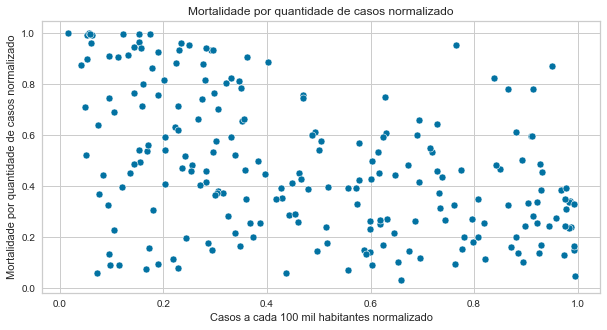

In [7]:
sct = sns.scatterplot(x = conf_per_100_norm, y = dth_norm, color= 'b')
sct.set_xlabel('Casos a cada 100 mil habitantes normalizado')
sct.set_ylabel('Mortalidade por quantidade de casos normalizado')
sct.set_title('Mortalidade por quantidade de casos normalizado')
sct.figure.set_size_inches(10, 5)

In [8]:
obj = {'Normalized confirmed per 100k' : conf_per_100_norm, 'Normalized death rate': dth_norm}

In [9]:
input_data = pd.DataFrame(data= obj)
input_data

,Normalized confirmed per 100k,Normalized death rate
0,0.685875,0.264779
1,0.515425,0.178016
2,0.931677,0.455742
3,0.282856,0.415804
4,0.921977,0.254909
...,...,...
218,0.143561,0.764520
219,0.095619,0.132264
220,0.134874,0.451722
221,0.112134,0.906517


In [10]:
model = KMeans()

In [11]:
visualizer = KElbowVisualizer(model, k=(1,10))

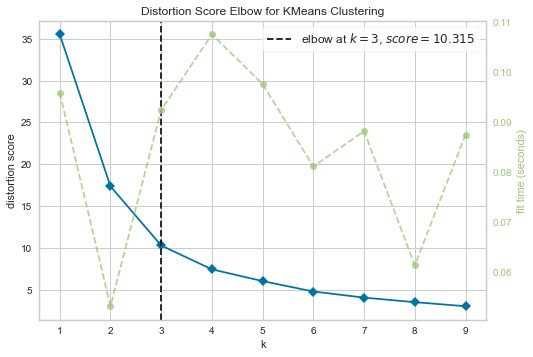

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer.fit(input_data)
visualizer.show()

In [29]:
# Coloquei o número de clusters como 3 por causa do elbow method
# Mas dá pra diminuir a inertia_ dá uma olhada antes de mandar
kmeans = KMeans(n_clusters= 3)

In [26]:
kmeans.fit(input_data)

KMeans(n_clusters=3)

In [27]:
kmeans.inertia_

10.315129910611713

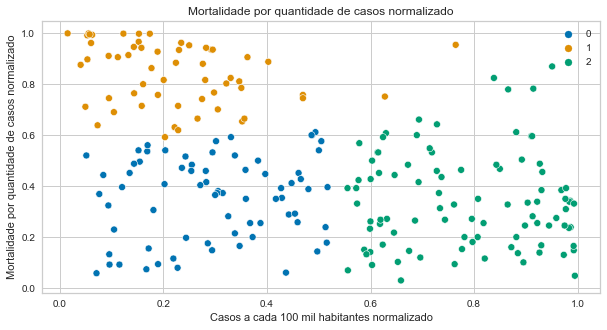

In [28]:
ax = sns.scatterplot(x = 'Normalized confirmed per 100k', y = 'Normalized death rate', data= input_data, hue= kmeans.labels_, palette= 'colorblind')
ax.set_xlabel('Casos a cada 100 mil habitantes normalizado')
ax.set_ylabel('Mortalidade por quantidade de casos normalizado')
ax.set_title('Mortalidade por quantidade de casos normalizado')
ax.figure.set_size_inches(10, 5)